In [4]:
import cv2
import numpy as np
import cairocffi as cairo
import io
import preproc
import detection
import chrecog
chrecog.load_ckpt("data/161019.ckpt")
import reconst
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'Greys'

ckpt loaded


In [5]:
def write_line(text, font="NanumGothic"):
    WIDTH, HEIGHT = 540, 100
    surface = cairo.ImageSurface (cairo.FORMAT_RGB24, WIDTH, HEIGHT)
    ctx = cairo.Context (surface)
    ctx.set_font_size(40)
    ctx.set_source_rgb(0, 0, 0)
    ctx.paint()
    ctx.set_source_rgb(1, 1, 1)
    ctx.select_font_face(font, cairo.FONT_SLANT_NORMAL,
                cairo.FONT_WEIGHT_NORMAL)
    ctx.move_to(20,40)
    ctx.show_text(text)
    fb = io.BytesIO()
    surface.write_to_png(fb)
    fb.seek(0)
    blob = fb.read()
    blob_array = np.asarray(bytearray(blob), dtype=np.uint8)
    mat = cv2.imdecode(blob_array, 0)
    fb.close()
    return mat

In [6]:
def test_line(text, font="NanumGothic"):
    img = write_line(text, font)
    plt.figure()
    plt.imshow(img)

    processed = preproc.process(img)
    graphs = detection.get_graphs(processed)

    i=0
    for p in graphs:
        for l in p.lines:
            for c in l.chars:
                if i % 10 == 0:
                    plt.figure()
                plt.subplot(1,10,i%10+1)
                plt.xticks(())
                plt.yticks(())
                plt.imshow(c.img)
                i += 1
                c.pred = chrecog.get_pred_one(c.img)

    print(reconst.build_graphs(graphs), end="")
    
def test_img(path):
    img = cv2.imread(path)
    plt.figure()
    plt.imshow(img)

    processed = preproc.process(img)
    graphs = detection.get_graphs(processed)

    i=0
    for p in graphs:
        for l in p.lines:
            for c in l.chars:
                if i % 10 == 0:
                    plt.figure()
                plt.subplot(1,10,i%10+1)
                plt.xticks(())
                plt.yticks(())
                plt.imshow(c.img)
                i += 1
                c.pred = chrecog.get_pred_one(c.img)

    print(reconst.build_graphs(graphs))

/home/north/.virtualenvs/tensor/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


러운들에게썬주고J치고의외국교수말초빙해
시핵생늘edl게치상의제공해기위해서는어느정도의예산아
필요싸고생각했대씨미국의밍문대하의예뽄2~3조원에이
놔z맘예산이쏘Nl국의하버느대뺘에산이무러4죠
윈읕넘고한해모금액이5천억윈을넘난.이듣대학의날전기금도
싸조원에이르지h우리태학의예쌰이애바할수없이적은것이
====
빔이다.
선진국에서는비로개인이나회Wt재쏞u낳때는수반법을가
리지않아때로는비난도받지만선선한기누나엄성난써바로
부의의마있는분배가Ql루어진다t투히잘빱된Zl써는본뺳
빤테인생을비쏴기진에사희에보싸임음하겠노한마
음에서w에게는인싼물러나머지거의진재싾불우청소
년이t}자선단체에기쮼l-거나시민을위한쀼관이냐대학도서관
올건립하거나,t기곰로내하에기것이자연스런잍로어
겨진다우라나라의기업이나개인즁에서도훋반자선할마해어
우라에게큰빠슌깅우가크게넵있어참반Z소식이다e
내기-시기금모꾢축복하는천사기-생각보다읻찌찾아왔나e
M년8월%일<조선알보>(김영신Zl재가아래오ut쏜요l로보
노하옜듯이화-에취암한지얼마되지싼어느낱요흰섹남뱡ll
싸t지률임은7u대k}총장심로뷰찻땄다u봐싣지쀼
아어떻개오나뵈a소충잠님을뵙고선나고싶
이찾e다고하어내게안네되었다나롤만나노힌뉴히니뷸
====



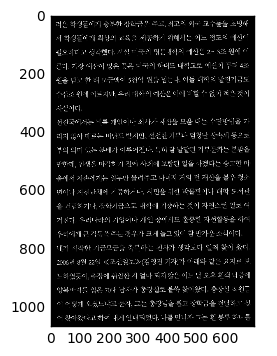

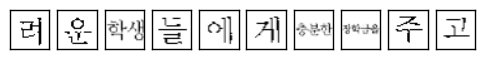

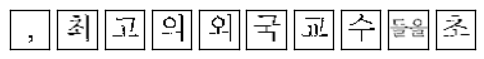

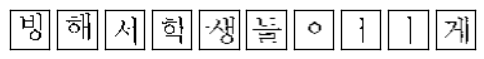

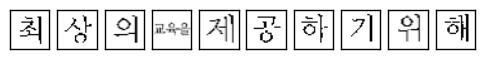

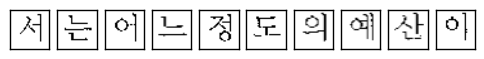

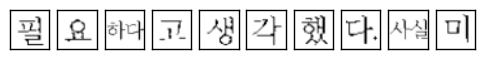

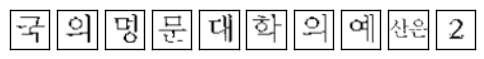

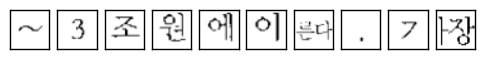

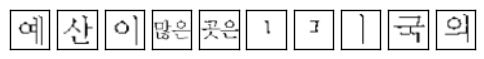

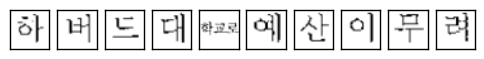

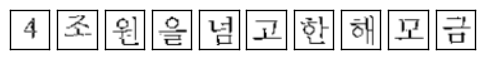

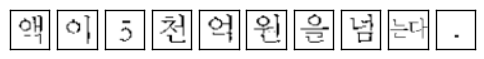

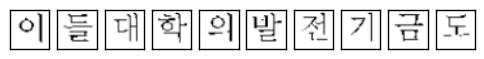

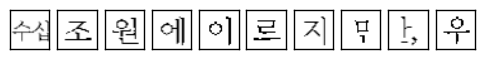

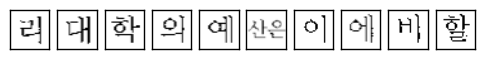

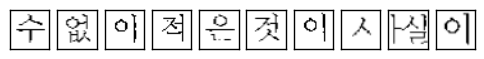

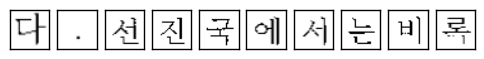

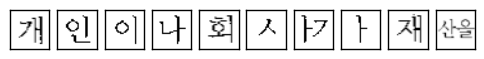

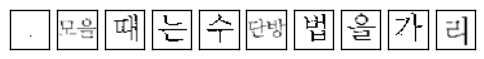

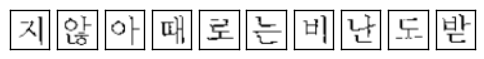

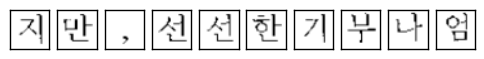

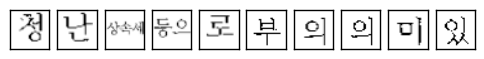

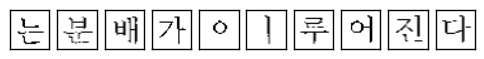

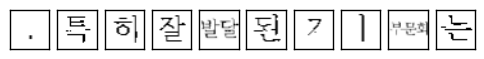

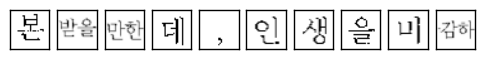

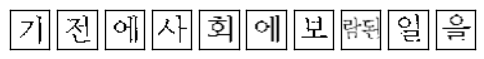

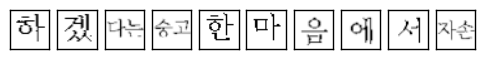

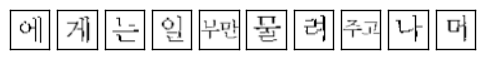

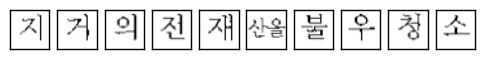

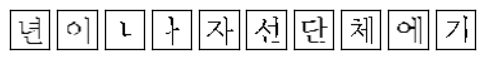

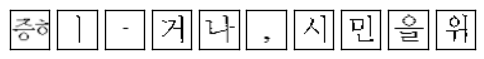

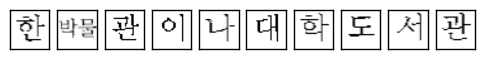

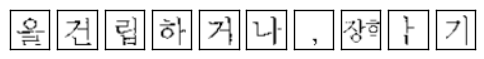

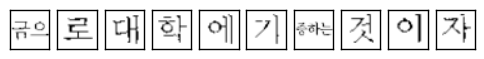

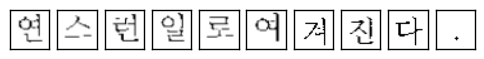

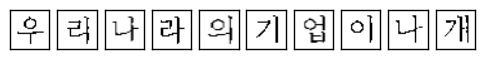

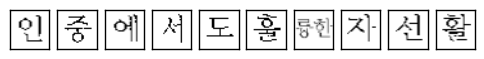

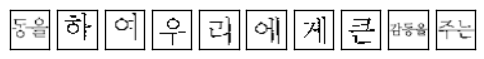

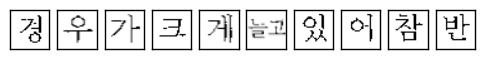

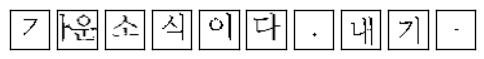

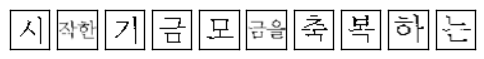

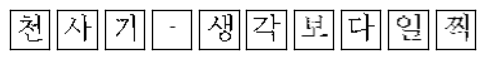

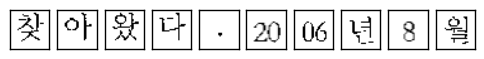

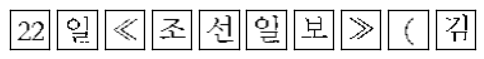

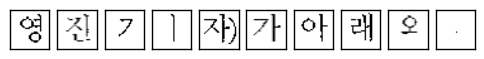

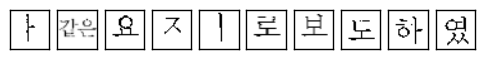

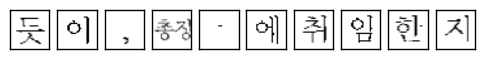

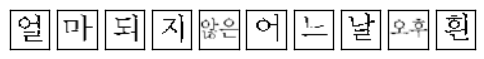

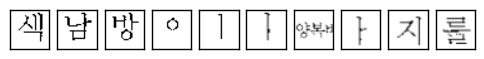

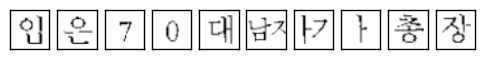

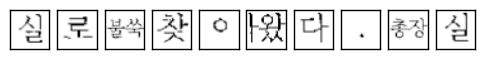

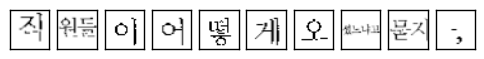

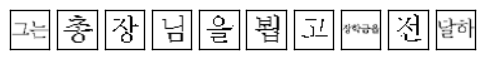

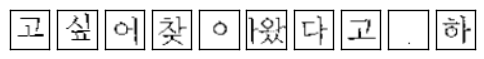

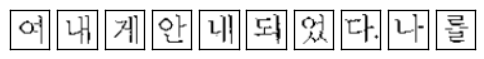

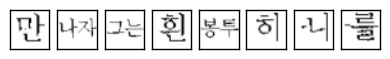

In [7]:
test_img("sample.png")